<h1 style="font-size: 40px; margin-bottom: 0px;">&#127875;10.2 RNA-seq counts</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

In notebook 10-1, we aligned our RNA-seq reads to a reference genome using the splice aware aligner HISAT2, and today, we'll be counting our mapped reads in order to set up for our subsequent differential expression analysis. To do this, we'll make use of a program called HTSeq, which will allow us to count the reads mapped to different genomic features, and in the case of RNA-seq, we're interested in counting reads that have mapped to exons. Each group will then obtain raw counts for their control and TAZ KO replicates. We'll take a look at the data in our Python notebooks to do some basic QC, and then take a look to see if we might have some potentially differentially expressed genes just solely based on one replicate. Like for 9-1 and 10-1, we'll set up our scripts, then we can breakdown the code and concepts while our script runs.

We'll then work on a Python script that we can incorporate into the analysis pipeline that we've beeen setting up so far, so our scripts will be able to proceed through all the RNA-seq analysis steps that we've gone through up until this point.

<strong>Learning objectives:</strong>

<ul>
    <li>Setting up checkpoints in bash scripts</li>
    <li>Incorporate read counting into our scripts</li>
    <li>Run a QC on read counts for your group's replicate</li>
</ul>

<h1 style="font-size: 40px; margin-bottom: 0px;">Counting reads with HTSeq</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

<a href="https://htseq.readthedocs.io/en/master/index.html" rel="noopener noreferrer"><u>Documentation for HTSeq can be found here.</u></a>

HTSeq (High-throughput sequence analysis in Python) is developed by Fabio Zanini, Simon Anders, Givanna Putri and contributors (<a href="https://academic.oup.com/bioinformatics/article/38/10/2943/6551247" rel="noopener noreferrer"><u>Anders et al 2014</u></a>, <a href="https://academic.oup.com/bioinformatics/article/31/2/166/2366196" rel="noopener noreferrer"><u>Putri et al 2022</u></a>). It's a Python package that acts as a framework for working with high-throughput sequencing data in Python. We will make use of its ability to count reads within features when provided with an alignment file and with a genome annotation file. We'll set up our bash scripts to check for <code>HTSeq</code>, and if needed, install <code>HTSeq</code> and if successful, run <code>htseq-count</code>. After you obtain your group's count data, you'll use this Python notebook to play around with the outputs to run some quick QC.

<h2>1. Create a checkpoint to verify <code>HTSeq</code> installation</h2>

Recall how we've had to manually reinstall due to how our servers reset to a default configuration, so to help our script run in a more automated way, we can set up a checkpoint to verify whether <code>HTSeq</code> is installed, and to install it if needed. Recall from 10-1, when commands are successfully executed, they <code>exit</code> with a value of <code>0</code>, but if they fail to run, they exit with a value that is <code>1</code> or greater. This then allows us to check based on the exit value to verify an installation and install if needed by taking advantage of what we know about conditional statements.

In [1]:
%%bash

######################################################
#
# Refer to class bash script for code and annotations
#
######################################################

<h2>2. Pull out some rows from our annotation file to look at later</h2>

Genomic features are usually annotated in a GFF or GTF format, which is a fairly large tab-delimited table containing the following information for each annotated genomic feature:

<table style="text-align: center;">
    <tr style="font-size: 15px;">
        <th>seqname</th>
        <th>source</th>
        <th>feature</th>
        <th>start</th>
        <th>end</th>
        <th>score</th>
        <th>strand</th>
        <th>frame</th>
        <th>attribute</th>
    </tr>
    <tr>
        <td>Chr name</td>
        <td>Program that generated the data or the data source</td>
        <td>type of feature (gene, exon, cds, etc)</td>
        <td>start position</td>
        <td>end position</td>
        <td>floating point value</td>
        <td>+ or -</td>
        <td>codon frame</td>
        <td>additional information for each feature</td>
    </tr>
</table>

For this step, we'll incorporate into our shell script a quick operation to pull out some rows from our GTF file so that we can take a look at it later to better understand the information it contains.

In [2]:
%%bash

######################################################
#
# Refer to class bash script for code and annotations
#
######################################################

<h2>3. Set up <code>htseq-count</code> to obtain read counts</h2>

One of the main things you can do with HTSeq is to determine how many reads overlap with a specific set of genomic features. For example, you can count the reads that overlap with exons in order to begin estimating the levels of gene expression in your cell. HTSeq contains a specific script that performs read quantification with the intention that you will later perform differential expression analysis.

We will set up in our RNA-seq script the command line input to take a gene annotation file and alignment files to quantify how many reads map to each annotated gene.

<a href="https://htseq.readthedocs.io/en/master/htseqcount.html" rel="noopener noreferrer"><u>Documentation specifically for <code>htseq-count</code> can be found here.</u></a>

In [3]:
%%bash

######################################################
#
# Refer to class bash script for code and annotations
#
######################################################

Now let's run our full script with the FastQC, alignment, and read counting. And we can review the associated concepts and breakdown the code from 9-1, 10-1, and for read counting.

<h2>Let's break down the code:</h2>

<code>htseq-count</code>

This is to call up the script to get the counts of reads mapped to a set of genomic features.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>-t exon</code>

The <code>-t</code> option allows us to specify what type of feature from the <strong>feature</strong> column of the GTF file that we want to obtain read counts for. In this setup, we are looking to determine how many reads overlap with annotated exons.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>-i gene_id</code>

The <code>-i</code> option provides the labels for each exon that we determine the counts for. Here, we specify that we want it to pull the <strong>gene_id</strong>, and use it as the label for its respective exon.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>-r name</code>

Here, we specify that our BAM file reads are sorted by name.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>-s reverse</code>

This option tells <code>htseq-count</code> the strandedness of your cDNA library, and it's an important option because it will have a noticeable impact on the raw counts that you get. If you select the incorrect strandedness, you will end up with inaccurate quantifications that will impact your differential expression analysis. 

Since our cDNA library is directional on the first strand, so we will need to specify <code>reverse</code> for the strandedness option.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>-f bam</code>

We provide the information on the type of alignment file that we are using as the input(s). Our alignment files are BAMs, so we specify <code>bam</code>.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>"${sorted_bams[@]}"</code>

After we specify our options, we then provide the alignment files that we want to obtain read counts for. Here, we can provide it with our BAM files that were sorted by name by expanding our variable <code>sorted_bams</code>. This will allow us to supply our BAM files for our control and our TAZ KO samples.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>"${gtf_file}"</code>

Then we specify the annotation file that we want it to use in order to identify how many reads are overlapping with known genomic features. In our case, we provide it with a file containing gene annotations which we've saved to a variable <code>gtf_file</code> that points to the file <code>~/shared/2025-fall/courses/1547808/rna-seq/rna-feature/hg19-refseq.gtf</code>.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>&gt; "${output_parent}/counts/1M_g1_counts.txt"</code>

We then tell it to redirect the output to a <code>.txt</code> file that we can then play around with later and use for differential expression analysis.


<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise Set 1</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

Since we provided <code>htseq-count</code> with two BAM files as once, it will provide us with a data matrix containing the read counts for both our control and TAZ KO samples.

The first column should contain the <code>gene_id</code> that we instructed <code>htseq-count</code> to use to identify each feature. So we'll have the gene symbols in the first column. The second column should contain your raw counts for your control sample, and the third column should contain your raw counts for your TAZ KO sample.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

<h2>Exercise #1: Import <code>sample-gtf-to-explore.txt</code></h2>

Here, load in the GTF rows that we pulled out from our original GTF file to explore a bit as a group when we reconvene. Recall that the table is tab-delimited.

You can add the following headers in the below order:
<ol>
    <li>seqname</li>
    <li>source</li>
    <li>feature</li>
    <li>start</li>
    <li>end</li>
    <li>score</li>
    <li>strand</li>
    <li>frame</li>
    <li>attribute</li>
</ol>

In [5]:
#Load in our data the usual way
#This part is just to take a look at a GTF annotation file to better understand its contents
#Data doesn't have headers, so we can specify them during import
hg19_refseq = pd.read_csv('./sample-gtf-to-explore.txt',
                          sep='\t',
                          header=None,
                          names=['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'],
                         )

In [6]:
#Now let's take a look
hg19_refseq.head().style
#What we are instructing HTSeq to pull out are the features (-t option)
#and the gene_id (-i option) from the attributes column

,seqname,source,feature,start,end,score,strand,frame,attribute
0,chrMT,ncbiRefSeq.2021-05-17,transcript,15956,16023,.,-,.,"gene_id ""TRNP""; transcript_id ""rna-TRNP""; gene_name ""TRNP"";"
1,chrMT,ncbiRefSeq.2021-05-17,exon,15956,16023,.,-,.,"gene_id ""TRNP""; transcript_id ""rna-TRNP""; exon_number ""1""; exon_id ""rna-TRNP.1""; gene_name ""TRNP"";"
2,chrMT,ncbiRefSeq.2021-05-17,transcript,15888,15953,.,+,.,"gene_id ""TRNT""; transcript_id ""rna-TRNT""; gene_name ""TRNT"";"
3,chrMT,ncbiRefSeq.2021-05-17,exon,15888,15953,.,+,.,"gene_id ""TRNT""; transcript_id ""rna-TRNT""; exon_number ""1""; exon_id ""rna-TRNT.1""; gene_name ""TRNT"";"
4,chrMT,ncbiRefSeq.2021-05-17,transcript,14747,15887,.,+,.,"gene_id ""CYTB""; transcript_id ""YP_003024038.1""; gene_name ""CYTB"";"


<h2>Exercise #2: Load in your group's counts matrix</h2>

Import the count matrix that you got for your control and TAZ KO samples. The output from <code>htseq-count</code> is tab-delimited without column headers, so you can specify the header names as <code>'gene'</code>, <code>'ctrl'</code>, and <code>'tazko'</code>.

In [7]:
#Load in our data the usual way and specify headers during import
counts = pd.read_csv('./counts/1M_g1_counts.txt',
                     sep='\t',
                     header=None,
                     names=['gene', 'ctrl', 'tazko'],
                    )

In [8]:
#Sanity check
counts.head().style

,gene,ctrl,tazko
0,A1BG,1,0
1,A1BG-AS1,1,3
2,A1CF,0,0
3,A2M,0,0
4,A2M-AS1,0,0


<h2>Exercise #3: Take a look at the last 10 rows</h2>

There's additional information about our counts at the last set of rows, so for this exercise, output just the last 10 rows to see what information it contains.

In [9]:
#Take a look at the last rows
counts.tail(10).style
#You'll see that there are several additional rows that provide additional information on our read counts
#These are reads that were not counted due to different reasons and are usually expected to happen to some degree
#Either did not map to any feature (no_feature)
#HTSeq wasn't able to confidently assign it to a feature, like if read overlaps two features (ambiguous)
#If there was issue with alignment (too_low_aQual, not_aligned)
#or if the read maps to more than one spot in genome (alignment_not_unique) so cannot assign to a feature
#Generally, you want these to be fairly low and you want the vast majority of your reads to be counted to a gene
#because we performed RNA-seq enriching for mRNAs, so supposedly most reads should come from genes (exons)

,gene,ctrl,tazko
43677,ZYX,161,151
43678,ZYXP1,0,0
43679,ZZEF1,27,41
43680,ZZZ3,60,51
43681,bA255A11.4,0,0
43682,__no_feature,81662,76791
43683,__ambiguous,22402,18979
43684,__too_low_aQual,42613,35349
43685,__not_aligned,95473,163548
43686,__alignment_not_unique,41373,42131


<h2>Exercise #4: Pull out information to perform QC</h2>

Let's take a look at our overall count statistics by pulling out the rows starting with the string <code>__</code> (double underscores) from our DataFrame using the <code>pd.Series.str.contains()</code> function. <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html" rel="noopener noreferrer"><u>Documentation for <code>pd.Series.str.contains()</code> can be found here.</u></a>

The output from <code>pd.Series.str.contains()</code> will return booleans, so see if you can use it to filter your data to just obtain the rows starting with <code>__</code>.

You can then save this to a new variable <code>read_stats</code>.

In [10]:
#We can use the pd.Series.str.contains() to filter our dataset
#essentially just pulling out those rows containing __
read_stats = counts[counts['gene'].str.contains('__')].copy()

#quick sanity check
read_stats.style

,gene,ctrl,tazko
43682,__no_feature,81662,76791
43683,__ambiguous,22402,18979
43684,__too_low_aQual,42613,35349
43685,__not_aligned,95473,163548
43686,__alignment_not_unique,41373,42131


<h2>Exercise #5: Update labels to remove <code>__</code></h2>

To tidy things up a bit, remove the initial <code>__</code> from the different labels from exercise #4. 

In [11]:
#We can then remove the __ 
read_stats['gene'] = read_stats['gene'].str.replace('__', '')

#quick check
read_stats.style

,gene,ctrl,tazko
43682,no_feature,81662,76791
43683,ambiguous,22402,18979
43684,too_low_aQual,42613,35349
43685,not_aligned,95473,163548
43686,alignment_not_unique,41373,42131


<h2>Exercise #6: Determine how many reads overlap with annotation genes</h2>

So you've pulled the reads that were not associated with any annotated genes in our GTF file, so the reads that were counted as part of our read counts are the remaining rows. In other words, the inverse of the rows containing the string <code>__</code> are the ones that contain the reads that were counted. We can continue to make use of the <code>pd.Series.str.contains()</code> function, but this time, see if you can pull the inverse to get all the rows containing gene counts. 

Then see if you can find the total number of counted reads for each sample condition <code>'ctrl'</code> and <code>'tazko'</code>. Combine the result with your updated <code>read_stats</code> DataFrame from exercise #5.

In [12]:
#We can filter based on the bitwise inverse ~ to switch False to True (0 to 1) and True to False (1 to 0)
#This then lets us select anything that does not contain __, which corresponds to all our counted reads
counted_reads = counts[~counts['gene'].str.contains('__')]

#can confirm this by taking a look at the tail
#should see that the additional read stats rows are filtered out
counted_reads.tail().style

,gene,ctrl,tazko
43677,ZYX,161,151
43678,ZYXP1,0,0
43679,ZZEF1,27,41
43680,ZZZ3,60,51
43681,bA255A11.4,0,0


In [13]:
#For QC purposes, we're primarily interested in the total number of counted reads rather than each individual gene's read count
#So here we can create a new row and populate it with 3 elements (one for each column)
#we provide those 3 elements as a list in the same order as the columns
#first column ('gene') will be populated with first element: 'counted_reads'
#second column ('ctrl') will be populated with 2nd element: sum of all counted reads for our control condition
#third column ('tazko') will be populated with 3rd element: sum of all counted reads for our tazko condition 
read_stats.loc[len(read_stats)] = ['counted_reads', sum(counted_reads['ctrl']), sum(counted_reads['tazko'])]

In [14]:
#do a quick sanity check to see
read_stats.style

,gene,ctrl,tazko
43682,no_feature,81662,76791
43683,ambiguous,22402,18979
43684,too_low_aQual,42613,35349
43685,not_aligned,95473,163548
43686,alignment_not_unique,41373,42131
5,counted_reads,716477,663202


<h2>Exercise #7: Generate a stacked bar plot with your <code>read_stats</code></h2>

Now use your <code>read_stats</code> DataFrame to generate a stacked bar plot that visualizes the proportion/percent of each category stacked on top of each other. You can set up your plot so that each sample condition <code>'ctrl'</code> and <code>'tazko'</code> is its own stacked bar.

This will allow us to then do a quick QC to see what what the proportion of each category is to get an idea of whether or not something may have gone wrong during counting.

Recall back in notebook 2-1 how we set up a stacked bar plot using <code>plt.bar()</code>. 

In [15]:
#We'll follow the same approach we used in notebook 2-1
#set our gene column as the index, so we're left with just numbers
read_stats.set_index('gene', inplace=True)
#Calculate the percentage
read_stats = read_stats.div(read_stats.sum(axis=0), axis=1) * 100
#Order of operations in the above is
#First we find the sum along each column, so we're left with 2 elements: total counts for ctrl and total counts for tazko
#Then we use those two elements and divide each row by its column's respective total
#Then we multiply by 100 to get a percent instead of the fraction

In [16]:
#Sanity check
read_stats.style

,ctrl,tazko
gene,,
no_feature,8.166200,7.679100
ambiguous,2.240200,1.897900
too_low_aQual,4.261300,3.534900
not_aligned,9.547300,16.354800
alignment_not_unique,4.137300,4.213100
counted_reads,71.647700,66.320200


In [17]:
#To simplify how we call up values for our for loop to plot a stacked bar plot
#we can transpose our DataFrame
#So our x-axis will just be determined by the row (index)
#and our y-axis values can be called up by calling up the column
read_stats = read_stats.T
read_stats

gene,no_feature,ambiguous,too_low_aQual,not_aligned,alignment_not_unique,counted_reads
ctrl,8.1662,2.2402,4.2613,9.5473,4.1373,71.6477
tazko,7.6791,1.8979,3.5349,16.3548,4.2131,66.3202


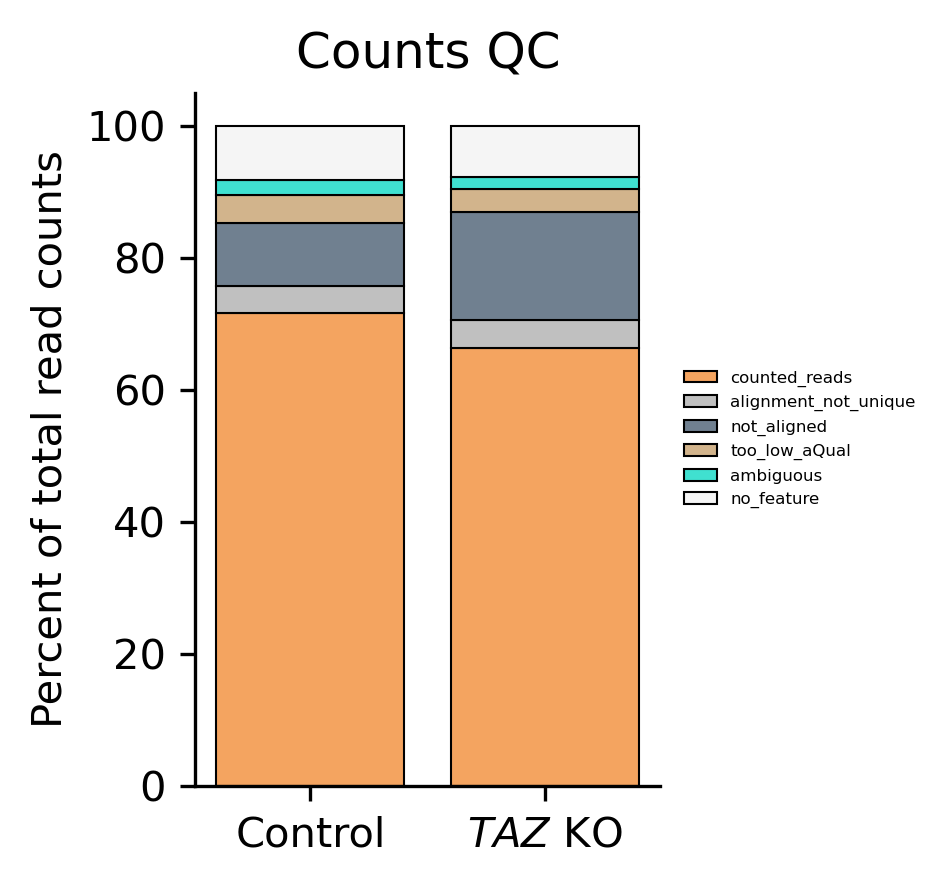

In [19]:
#Set up our plot in the usual way
fig, ax = plt.subplots()

#Set up how we will pull our axis values
#x values determined by the row (index)
#y values determined by the columns (in inverse order)
x = read_stats.index
y = read_stats.columns[::-1]

#Set up an array of zeros that we will update as we plot each bar
#So bottom will start at 0 for the first bar
#Then we will update with the height of the first bar
#which will then form the bottom of the second bar
#and so on
bottom = np.zeros(len(x))

#Setting up Jack's lazy way of plotting colors 'semi-randomly'
#You can also set up your own list/palette of hexcodes for colors you want to use
use_colors = pd.Series(mcolors.CSS4_COLORS)

#We will set up our for loop to loop through all columns
#and we do so using index values to allow us to also pull colors
for i in range(0, len(y), 1):
    #Use matplotlib bar function b/c seaborn can't plot stacked barplots easily
    plt.bar(x,                            #x axis values - constant for each loop
            read_stats[y[i]],             #y axis values - this changes each loop moving to the next column
            label=y[i],                   #labels - this also changes to update appropriately for each column
            bottom=bottom,                #this will update at the end of each loop allowing us to stack our bars one on top of the other
            color=use_colors[125+i*4],    #pulling numbers 'semi-randomly' - you can mess around with the calculation to pull different colors
            lw=0.5,                       #linewidth for stylistic reasons
            edgecolor='k',                #color lines for stylistic reasons
           )
    #This is where our
    bottom+=read_stats[y[i]]              

#Pretty up our plot
plt.title('Counts QC')
plt.ylabel('Percent of total read counts')
plt.xticks([0, 1],
           ['Control', '$TAZ$ KO']
          )

plt.legend(loc='center',
           bbox_to_anchor=(1.3, 0.5),
           fontsize=4,
           edgecolor='w',
          )

sns.despine()
fig.set_size_inches(2,3)
fig.set_dpi(300)
plt.show()

We'll reconvene here and take a look at how everyone's counts data looks like overall.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise Set 2</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

For this exercise set, you'll take a look at your group's data to see how the two sample conditions compare to one another to assess whether or not there is potentially a detectable difference between them. 

<h2>Exercise #1: Pull out just reads that got counted</h2>

For this exercise, filter your original dataset to obtain a data matrix containing just the genes and their respective read counts, and then export the DataFrame as a <code>.csv</code> file with the following naming scheme: <code>1M_g1_gene_counts.csv</code>, where <code>g1</code> is replaced by your group number.

In [27]:
#Filter to just get the reads that were counted as associated with a gene
counted_reads = counts[~counts['gene'].str.contains('__')].copy()

#We can export this for later to incorporate everyone's data
counted_reads.to_csv('./counts/1M_g1_gene_counts.csv',
                    index=False
                    )

In [28]:
#Sanity check
counted_reads.head().style

,gene,ctrl,tazko
0,A1BG,1,0
1,A1BG-AS1,1,3
2,A1CF,0,0
3,A2M,0,0
4,A2M-AS1,0,0


<h2>Exercise #2: Plot sample conditions against each other</h2>

Now, generate a scatter plot where each dot corresponds to a single gene, and its position along the x-axis is determined by its read count in <code>'ctrl'</code> and its position along the y-axis is determined by its read count in <code>'tazko'</code>. If the data is difficult to distinguish due to the presence of particular outliers, perform a log transformation on your read counts or plot on log axes.

[]

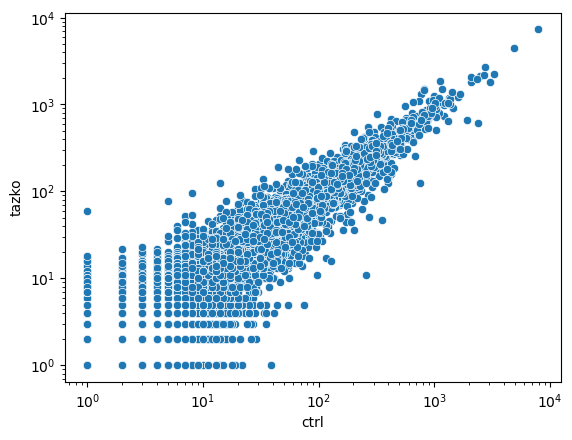

In [26]:
sns.scatterplot(data=counted_reads,
                x='ctrl',
                y='tazko',
               )

#Can adjust both axes at once with plt.loglog()
plt.loglog()

Consider what it means when a dot (gene) falls along the x=y axis vs showing some particular offset from x=y. What does its position in your scatter plot tell you about its expression in control vs TAZ KO cells?

<h2>Exercise #3: Visualize potentially downregulated and upregulated genes</h2>

With your single replicate, you can take a quick look to see if there may be differential expression between your sample groups. For this exercise, use the same scatter plot set up you used in exercise 2, but highlight those genes who have a 2-fold difference in their read counts in your TAZ KO sample compared to your control sample.

In [29]:
#If we're interested in getting an idea of overall how our single replicate looks
#We can take a look at the ratio to get a (not scientifically rigorous) look at our single replicate
counted_reads['ratio'] = counted_reads['tazko'] / counted_reads['ctrl']

#Keep in mind that this doesn't tell you anything about our data overall since we're just looking at a single replicate
#So you can't draw anything hard conclusions

In [30]:
#Sanity check to se how our DataFrame updated
counted_reads.head().style

,gene,ctrl,tazko,ratio
0,A1BG,1,0,0.000000
1,A1BG-AS1,1,3,3.000000
2,A1CF,0,0,nan
3,A2M,0,0,nan
4,A2M-AS1,0,0,nan


In [31]:
#Filter for uprgulated and downregulated based on the value of the ratio
downreg = counted_reads[counted_reads['ratio'] <= 0.5]
upreg = counted_reads[counted_reads['ratio'] >= 2]

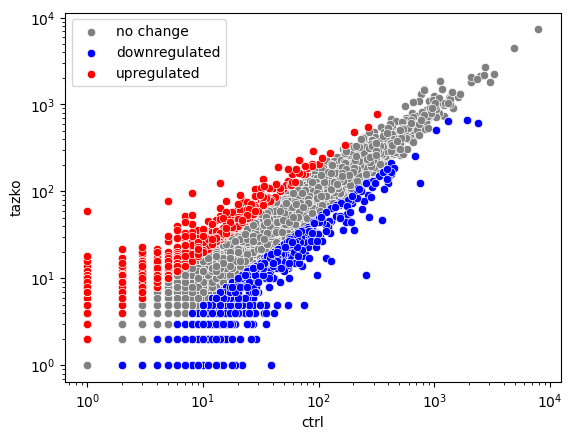

In [46]:
#Plot scatterplots overlaid on top of the original one
sns.scatterplot(data=counted_reads,
                x='ctrl',
                y='tazko',
                color='grey',
                label='no change'
               )

sns.scatterplot(data=downreg,
                x='ctrl',
                y='tazko',
                c='b',
                label='downregulated'
               )

sns.scatterplot(data=upreg,
                x='ctrl',
                y='tazko',
                c='r',
                label='upregulated'
               )

plt.legend()
plt.loglog();

Something to note is that these exercise sets are just from a single replicate based off of non-normalized counts, so we can't draw hard conclusions from this visualization, but it can help us get a sense of how our counts went.

Next week, we'll pull together our class counts and run a differential expression analysis to explore our results.

<h1 style="font-size: 40px; margin-bottom: 0px;">References</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

<a href="https://academic.oup.com/bioinformatics/article/31/2/166/2366196" rel="noopener noreferrer"><u>Anders et al 2015 Bioinformatics:</u></a> HTSeq—a Python framework to work with high-throughput sequencing data

<a href="https://academic.oup.com/bioinformatics/article/38/10/2943/6551247" rel="noopener noreferrer"><u>Putri et al 2022 Bioinformatics:</u></a> Analysing high-throughput sequencing data in Python with HTSeq 2.0